# Demonstrate the Sankey class by producing three basic diagrams

Code taken from the [Sankey API](http://matplotlib.org/api/sankey_api.html) at Matplotlib doc


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

/opt/ipnb/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Example 1 -- Mostly defaults

This demonstrates how to create a simple diagram by implicitly calling the
Sankey.add() method and by appending finish() to the call to the class.

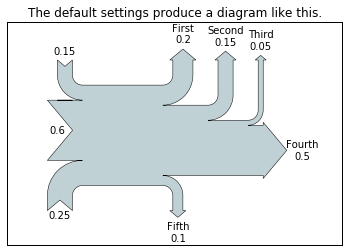

In [5]:
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.");
# Notice:
#   1. Axes weren't provided when Sankey() was instantiated, so they were
#      created automatically.
#   2. The scale argument wasn't necessary since the data was already
#      normalized.
#   3. By default, the lengths of the paths are justified.

## Example 2

This demonstrates:
1. Setting one path longer than the others
2. Placing a label in the middle of the diagram
3. Using the scale argument to normalize the flows
4. Implicitly passing keyword arguments to PathPatch()
5. Changing the angle of the arrow heads
6. Changing the offset between the tips of the paths and their labels
7. Formatting the numbers in the path labels and the associated unit
8. Changing the appearance of the patch and the labels after the figure is created

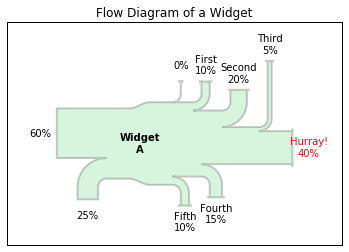

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.8, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA",
           alpha=0.2, lw=2.0)  # Arguments to matplotlib.patches.PathPatch()
diagrams = sankey.finish()
diagrams[0].patch.set_facecolor('#37c959')
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')
# Notice:
#   1. Since the sum of the flows is nonzero, the width of the trunk isn't
#      uniform.  If verbose.level is helpful (in matplotlibrc), a message is
#      given in the terminal window.
#   2. The second flow doesn't appear because its value is zero.  Again, if
#      verbose.level is helpful, a message is given in the terminal window.

## Example 3
This demonstrates:
1. Connecting two systems
2. Turning off the labels of the quantities
3. Adding a legend

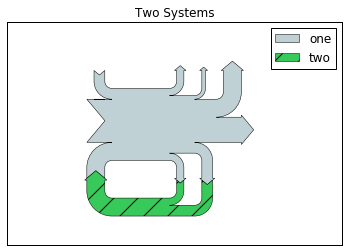

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")

sankey = Sankey(ax=ax, unit=None)

flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])

sankey.add(flows=[-0.25, 0.15, 0.1], fc='#37c959', label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))

diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
ax.legend(loc='best');
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.